In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

# Radar Pointing Directly Along Axis of the Road

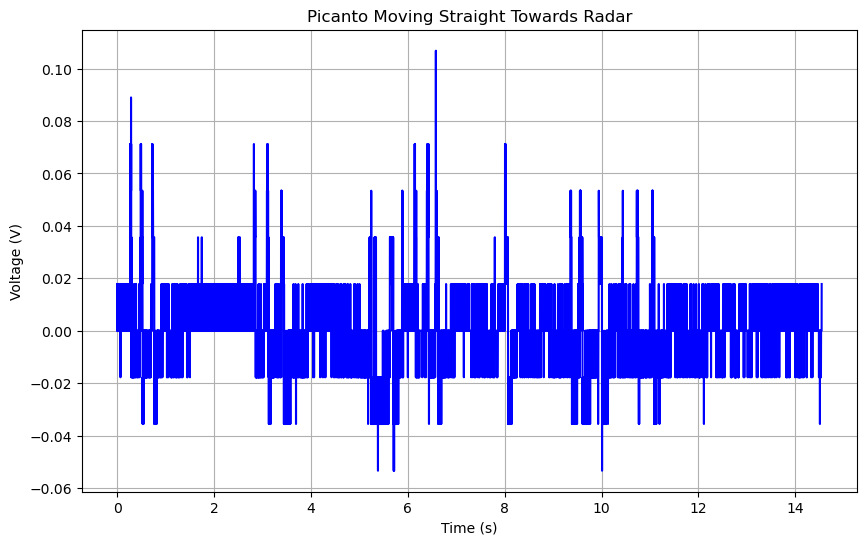

In [23]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('PointingAtVehicle/PicantoPointingStraight.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array
voltage_data = voltage_data - 1.53074 #removing added DC shift

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Picanto Moving Straight Towards Radar')
plt.grid(True)

# Show the plot
plt.show()


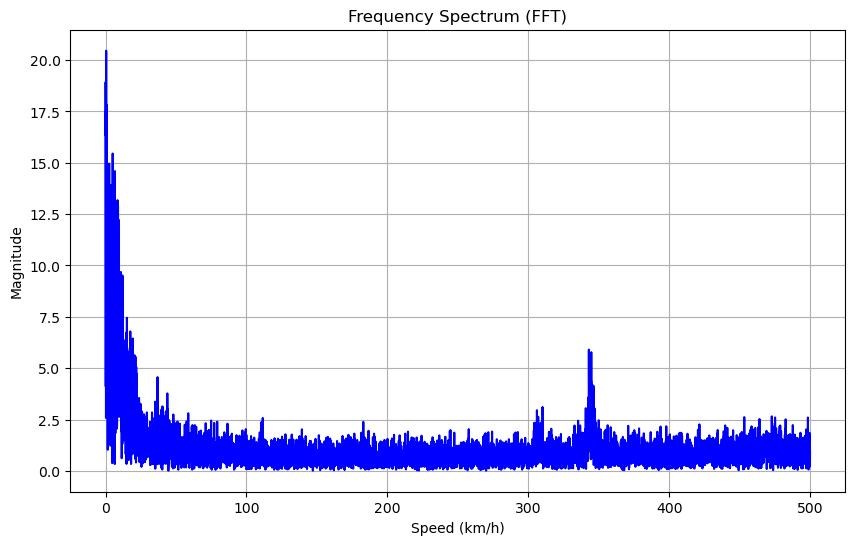

In [24]:

# Read the data from the text file (assuming you've already read the data as time_data and voltage_data)

# Sampling frequency (inverse of the time step)
sampling_frequency = 1 / (time_data[1] - time_data[0])

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Speed (km/h)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Show the plot
plt.show()

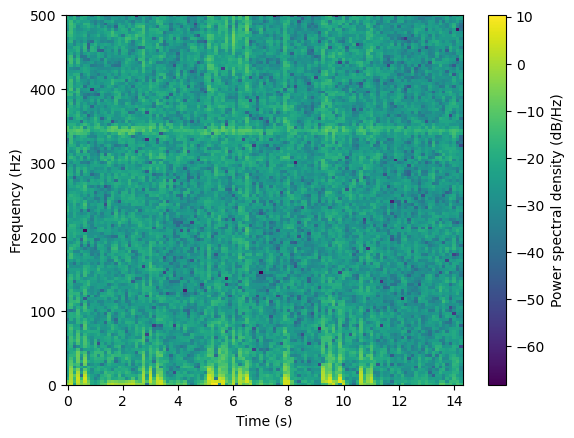

In [25]:
# Define the parameters for the spectrogram
window_size = 250  # Window size for the FFT
overlap    = 125  # Overlap between windows
Fs = sampling_frequency
# Window the signal
window = np.hanning(window_size)
windows = [voltage_data[i:i+window_size] * window for i in range(0, len(voltage_data)-window_size, window_size-overlap)]

# Compute the FFT for each window
spectrogram = [np.abs(np.fft.rfft(win))**2 for win in windows]

# Transpose the result to have time on the x-axis and frequency on the y-axis
spectrogram = np.array(spectrogram).T

# Plot the spectrogram
frequencies = np.fft.rfftfreq(window_size, d=1.0/Fs)
time = np.arange(len(spectrogram[0])) * (window_size - overlap) / Fs
plt.pcolormesh(time, frequencies, 10 * np.log10(spectrogram))
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Power spectral density (dB/Hz)")
plt.ylim([0, Fs/2.])
plt.show()

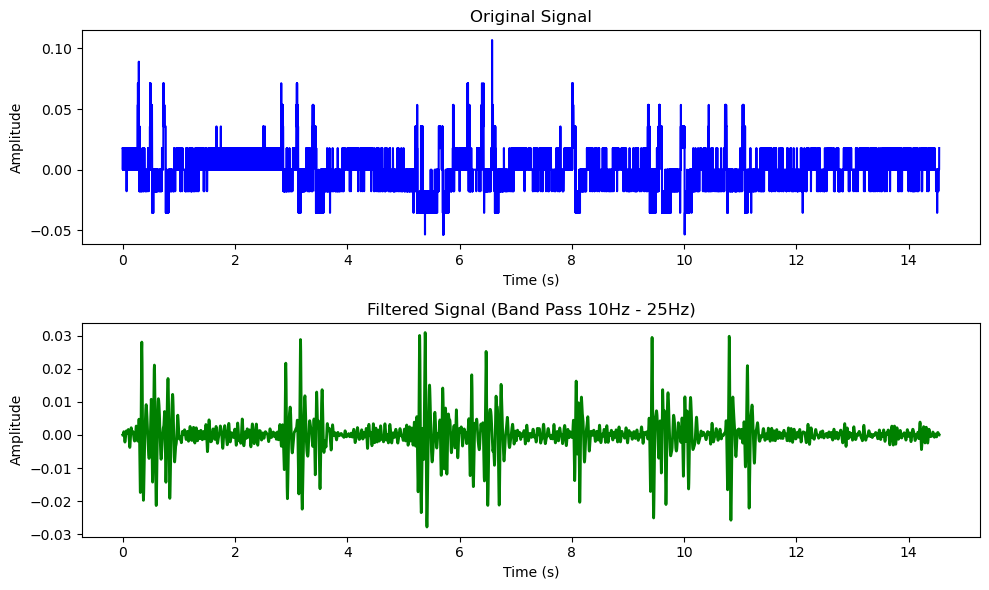

In [26]:
fs = sampling_frequency
# Define the bandpass filter parameters
lowcut = 10 # Lower cutoff frequency in Hz
highcut = 25  # Upper cutoff frequency in Hz
order = 4  # Filter order (adjust as needed)

# Create a bandpass Butterworth filter
b, a = signal.butter(order, [lowcut,highcut], btype='bandpass', fs=fs)

# Apply the filter to the voltage signal
filtered_signal = signal.lfilter(b, a, voltage_data)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_data, voltage_data, 'b-', label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time_data, filtered_signal, 'g-', linewidth=2, label='Filtered Signal')
plt.title('Filtered Signal (Band Pass 10Hz - 25Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


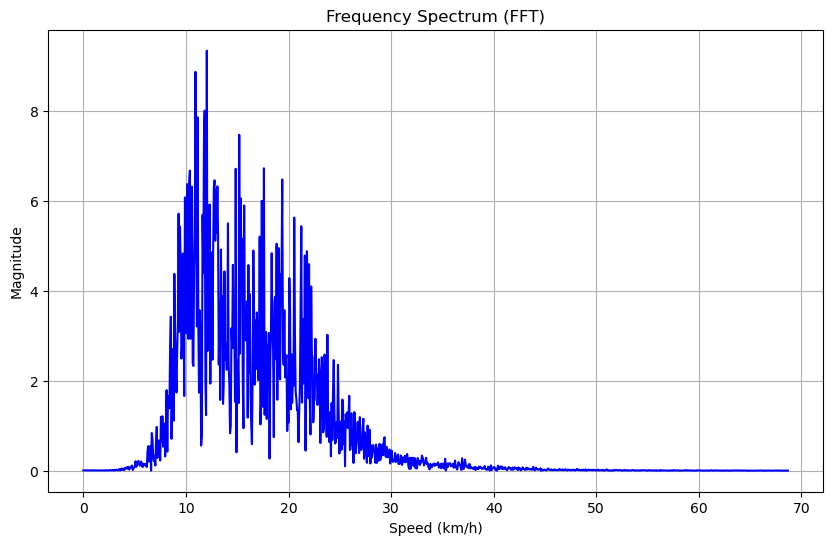

In [27]:

# Read the data from the text file (assuming you've already read the data as time_data and voltage_data)

# Sampling frequency (inverse of the time step)
sampling_frequency = 1 / (time_data[1] - time_data[0])

# Perform the FFT
fft_result = np.fft.fft(filtered_signal)
fft_freqs = np.fft.fftfreq(len(filtered_signal), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2][0:1000], fft_magnitude[:len(fft_magnitude) // 2][0:1000], color='b')
plt.xlabel('Speed (km/h)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Show the plot
plt.show()

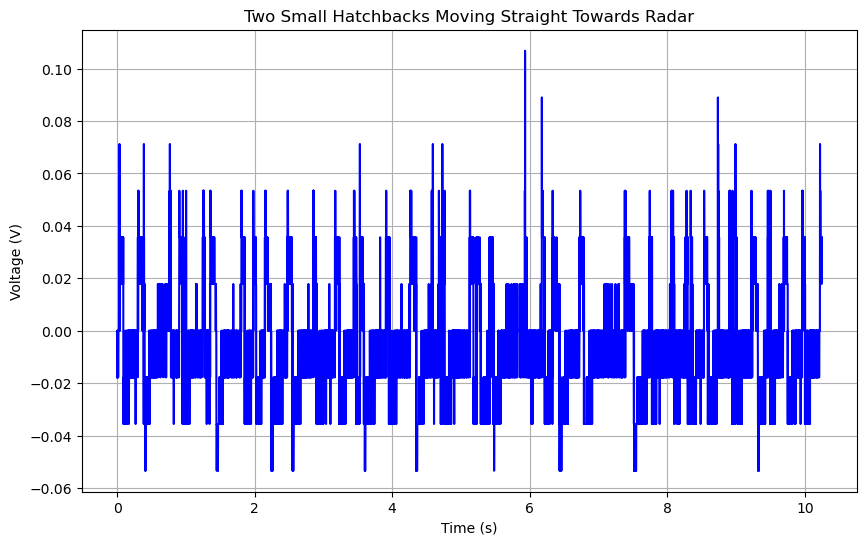

In [28]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('PointingAtVehicle/TwoSmallHatchbacksPointingStraightAhead.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array
voltage_data = voltage_data - 1.53074 #removing added DC shift

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Two Small Hatchbacks Moving Straight Towards Radar')
plt.grid(True)

# Show the plot
plt.show()

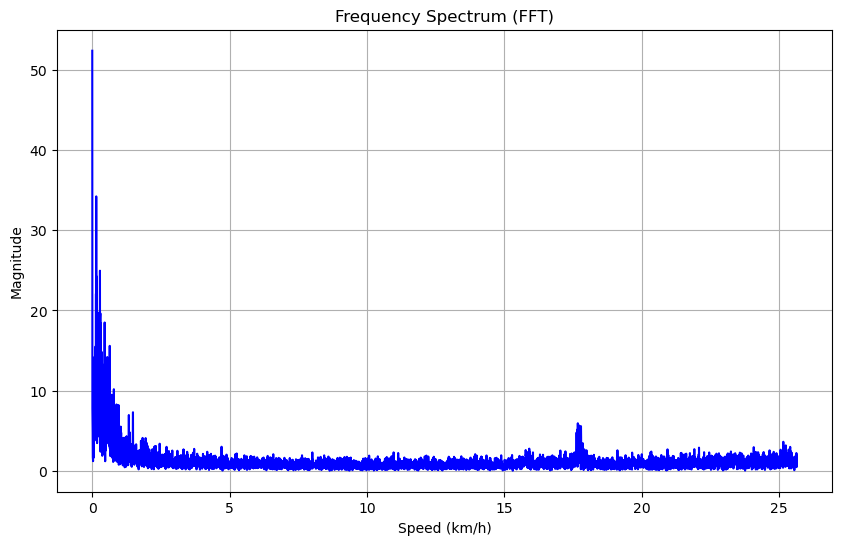

In [29]:

# Read the data from the text file (assuming you've already read the data as time_data and voltage_data)

# Sampling frequency (inverse of the time step)
sampling_frequency = 1 / (time_data[1] - time_data[0])

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2]/19.49, fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Speed (km/h)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Show the plot
plt.show()


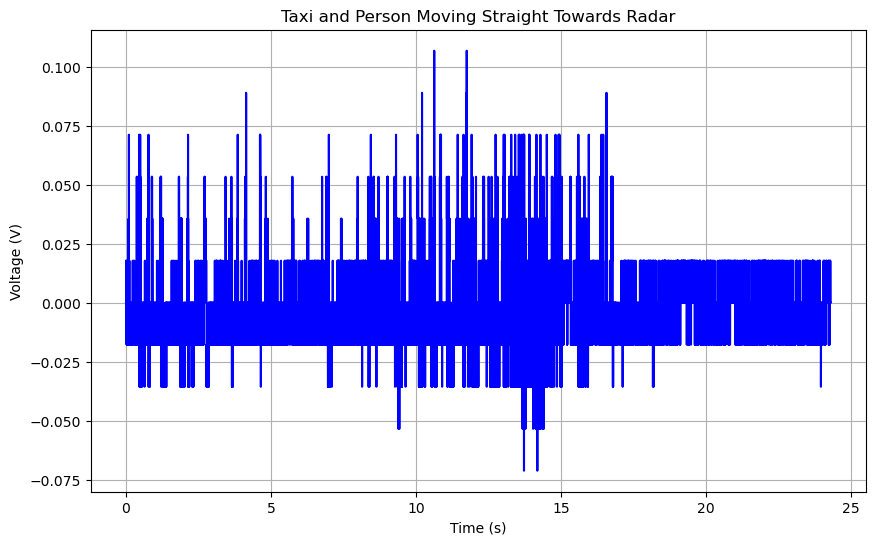

In [30]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('PointingAtVehicle/TaxiandPersonPointingStraight.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array
voltage_data = voltage_data - 1.53074 #removing added DC shift

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Taxi and Person Moving Straight Towards Radar')
plt.grid(True)

# Show the plot
plt.show()

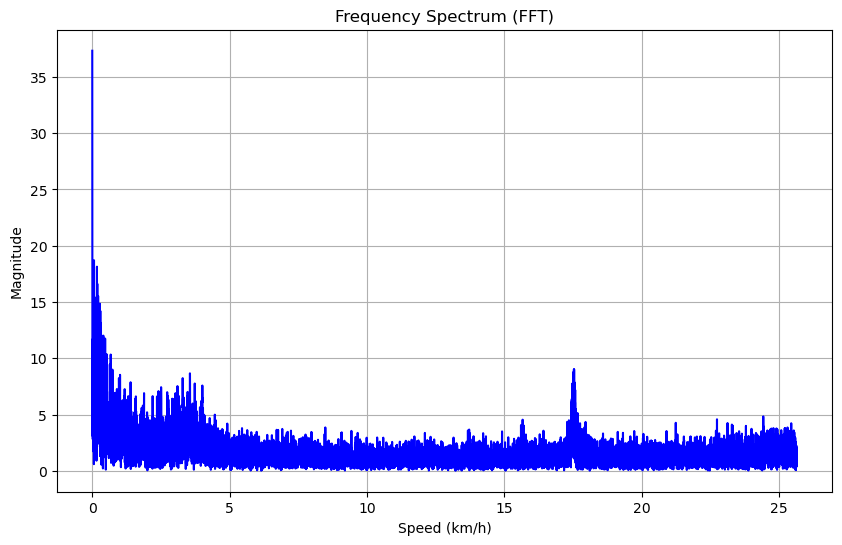

In [31]:

# Read the data from the text file (assuming you've already read the data as time_data and voltage_data)

# Sampling frequency (inverse of the time step)
sampling_frequency = 1 / (time_data[1] - time_data[0])

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2]/19.49, fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Speed (km/h)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Show the plot
plt.show()


# Radar Pointing Across the Road

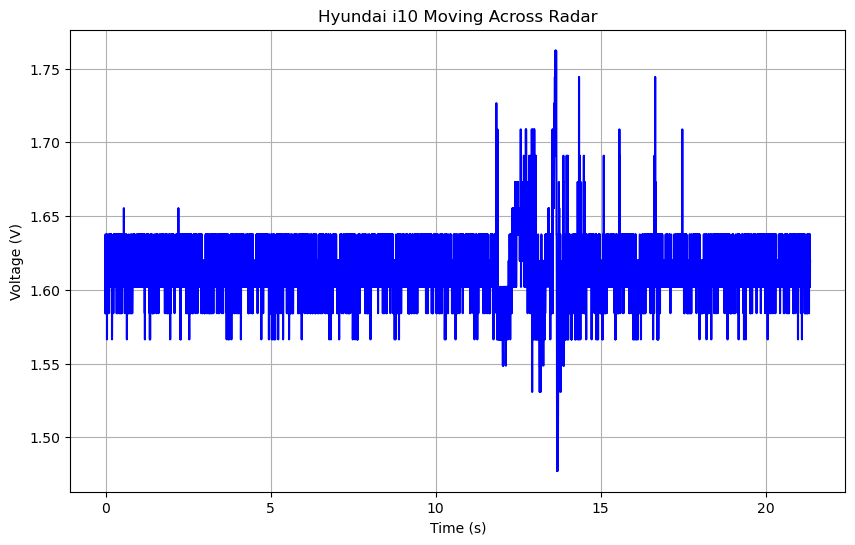

In [32]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('PointingAcrossRoad/Hyundaii10PointingAcross.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Hyundai i10 Moving Across Radar')
plt.grid(True)

# Show the plot
plt.show()

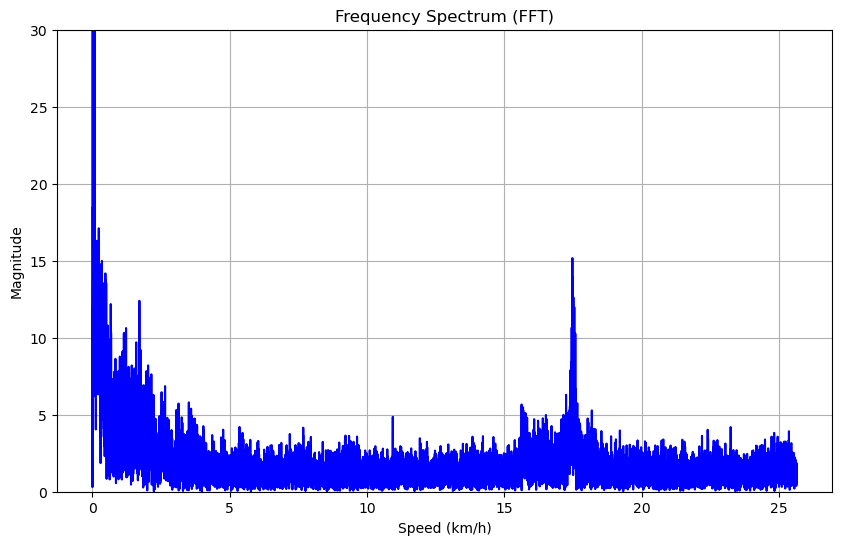

In [33]:

# Read the data from the text file (assuming you've already read the data as time_data and voltage_data)

# Sampling frequency (inverse of the time step)
sampling_frequency = 1 / (time_data[1] - time_data[0])

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2]/19.49, fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Speed (km/h)')
plt.ylabel('Magnitude')
plt.ylim(0,30)
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Show the plot
plt.show()


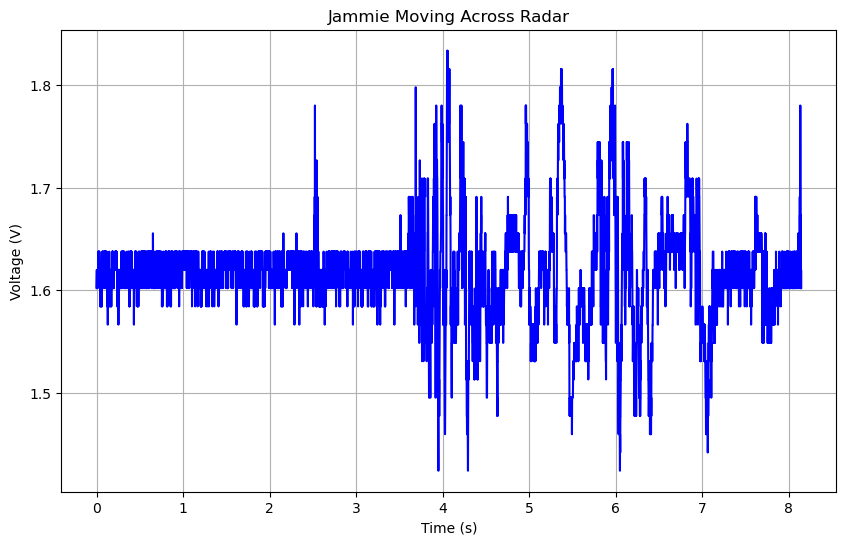

In [34]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('PointingAcrossRoad/JammiePointingAcross.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Jammie Moving Across Radar')
plt.grid(True)

# Show the plot
plt.show()

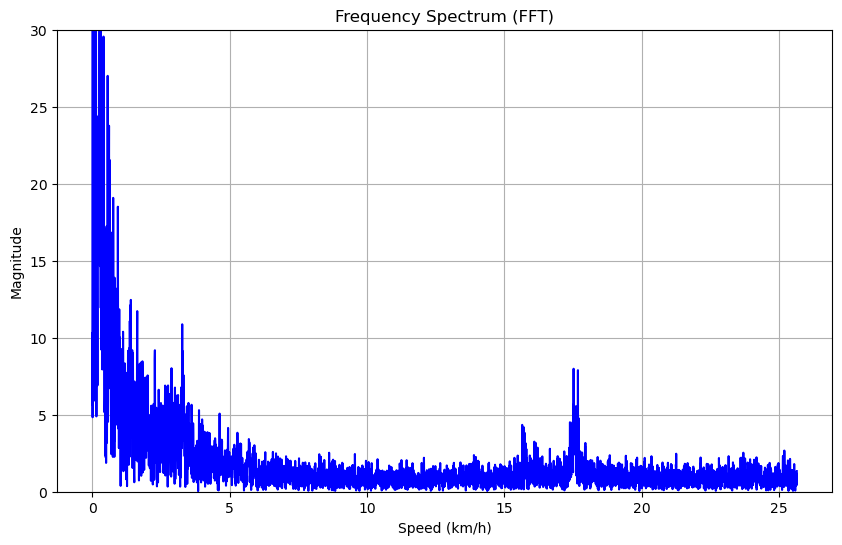

In [35]:

# Read the data from the text file (assuming you've already read the data as time_data and voltage_data)

# Sampling frequency (inverse of the time step)
sampling_frequency = 1 / (time_data[1] - time_data[0])

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2]/19.49, fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Speed (km/h)')
plt.ylabel('Magnitude')
plt.ylim(0,30)
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Show the plot
plt.show()


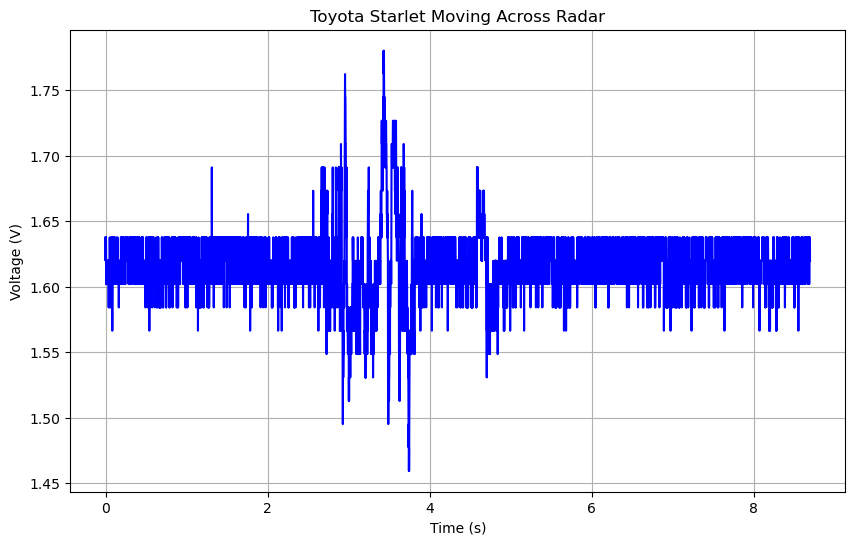

In [36]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('PointingAcrossRoad/ToyotaStarletPointingAcross.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Toyota Starlet Moving Across Radar')
plt.grid(True)

# Show the plot
plt.show()

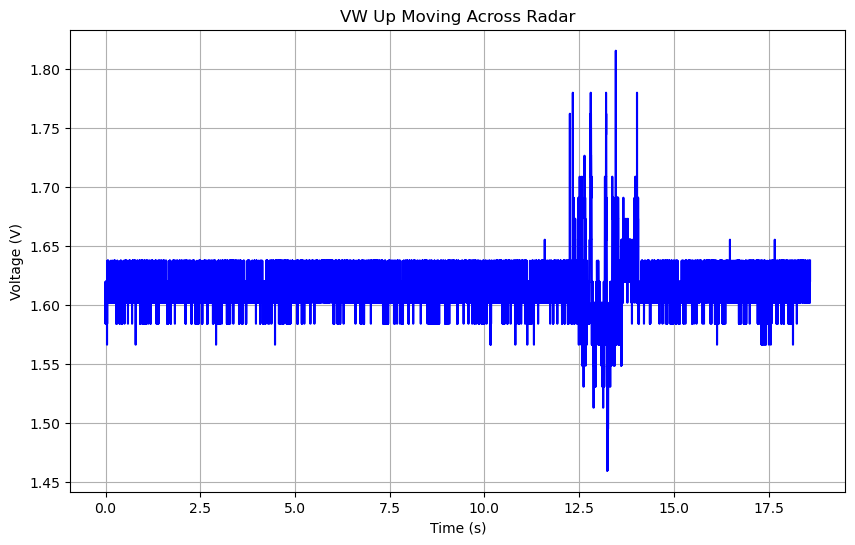

In [37]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('PointingAcrossRoad/VWUpPointingAcross.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('VW Up Moving Across Radar')
plt.grid(True)

# Show the plot
plt.show()

# Radar Pointing Diagonally Across the Road

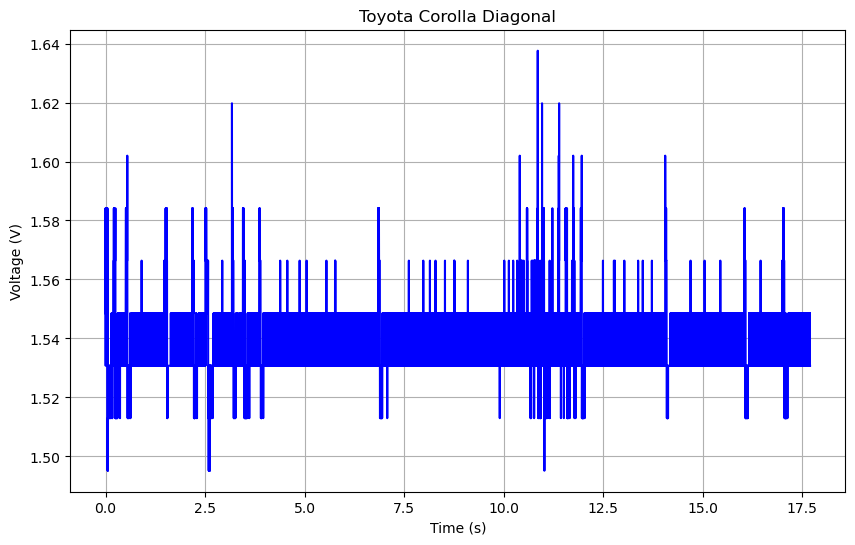

In [38]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('PointingDiagonally/SmallHatchback.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Toyota Corolla Diagonal')
plt.grid(True)

# Show the plot
plt.show()

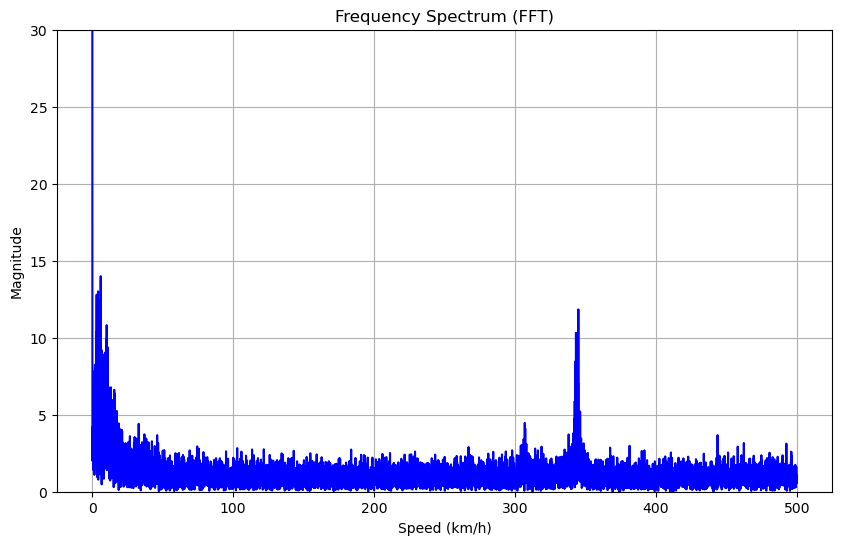

In [39]:

# Read the data from the text file (assuming you've already read the data as time_data and voltage_data)

# Sampling frequency (inverse of the time step)
sampling_frequency = 1 / (time_data[1] - time_data[0])

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Speed (km/h)')
plt.ylabel('Magnitude')
plt.ylim(0,30)
plt.title('Frequency Spectrum (FFT)')
plt.grid(True)

# Show the plot
plt.show()


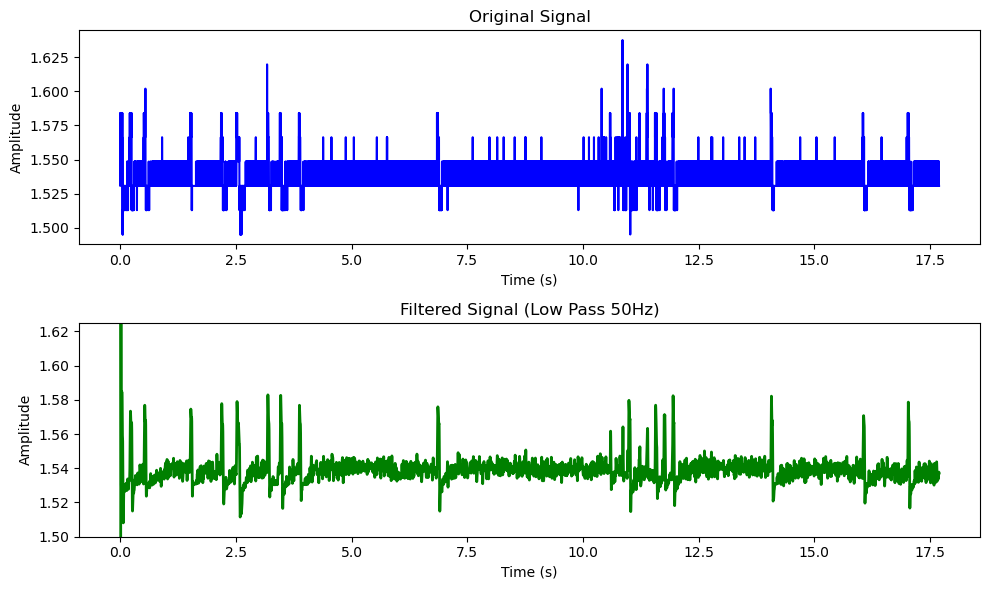

In [40]:
fs = sampling_frequency
# Define the bandpass filter parameters
lowcut = 10 # Lower cutoff frequency in Hz
highcut = 50  # Upper cutoff frequency in Hz
order = 4  # Filter order (adjust as needed)

# Create a bandpass Butterworth filter
b, a = signal.butter(order, [highcut], btype='lowpass', fs=fs)

# Apply the filter to the voltage signal
filtered_signal = signal.lfilter(b, a, voltage_data)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_data, voltage_data, 'b-', label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(time_data, filtered_signal, 'g-', linewidth=2, label='Filtered Signal')
plt.title('Filtered Signal (Low Pass 50Hz)')
plt.ylim(1.5,1.625)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# Experimenting with Integration

In [41]:
def delete_every_n_elements(arr, n): #if n = 3 then every fourth sample is kept
    if n <= 1:
        return arr

    new_array = []
    for i in range(len(arr)):
        if (i) % n == 0:
            new_array.append(arr[i])

    return new_array

def delete_every_n_elements1(arr, n): #if n = 3 then every fourth sample is kept
    if n <= 1:
        return arr

    new_array = []
    for i in range(len(arr)):
        if (i) % n == 0:
            new_array.append(arr[i])

    return new_array

def delete_every_n_elements2(arr, n): #if n = 3 then every fourth sample is kept
    if n <= 1:
        return arr

    new_array = []
    for i in range(len(arr)):
        if (i) % n == 0:
            new_array.append(arr[i])

    return new_array


array = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

new_array = delete_every_n_elements(array,3)

print(new_array)



[1, 4, 7, 10]


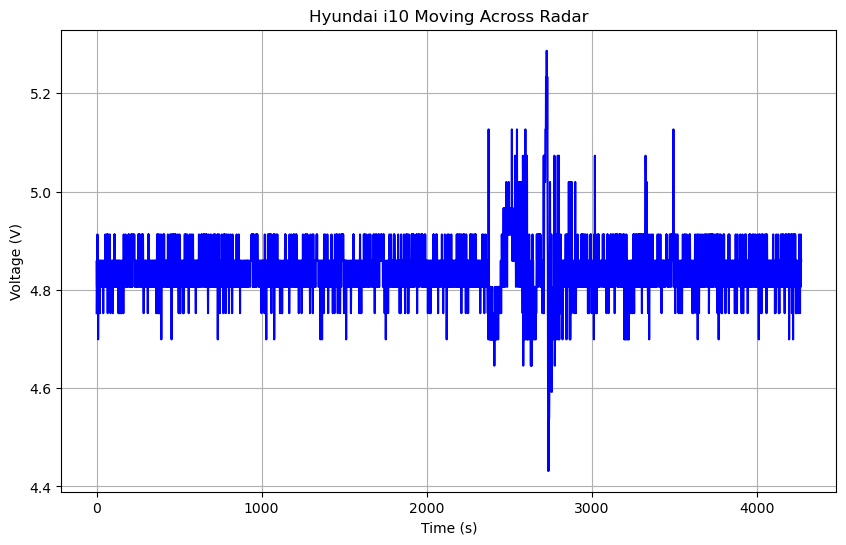

In [42]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('PointingAcrossRoad/Hyundaii10PointingAcross.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array
voltage_data1 = np.array(delete_every_n_elements(voltage_data, 5))
voltage_data2 = np.array(delete_every_n_elements1(voltage_data, 5))
voltage_data = np.array(delete_every_n_elements2(voltage_data, 5))
voltage_data = voltage_data + voltage_data1 + voltage_data2
#time_data = delete_every_n_elements(time_data, 10)

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Hyundai i10 Moving Across Radar')
plt.grid(True)

# Show the plot
plt.show()